In [ ]:
!pip install lazypredict

In [ ]:
# Install LazyPredict if you haven't already
# !pip install lazypredict

from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Load your preprocessed data
df = pd.read_csv("/content/drive/MyDrive/project integration football/football_datawc2019_processed.csv")  # Use your processed CSV file

# Define features (X) and target variable (y)
X = df.drop(columns=['shot_statsbomb_xg'])  # Drop the target variable
y = df['shot_statsbomb_xg']  # Define the target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the LazyRegressor
lazy_regressor = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit and compare models
models, predictions = lazy_regressor.fit(X_train, X_test, y_train, y_test)

# Display the results
print(models)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
100%|██████████| 42/42 [00:12<00:00,  3.36it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000967 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1066
[LightGBM] [Info] Number of data points in the train set: 1051, number of used features: 45
[LightGBM] [Info] Start training from score 0.109387
                                         Adjusted R-Squared  \
Model                                                         
GradientBoostingRegressor                              0.78   
HistGradientBoostingRegressor                          0.78   
LGBMRegressor                                          0.77   
RandomForestRegressor                                  0.76   
ExtraTreesRegressor                                    0.76   
XGBRegressor                                           0.76   
BaggingRegressor                                       0.72   
NuSVR                       

**1. Importing Libraries:**

This step imports the necessary libraries. The GradientBoostingRegressor from Scikit-learn is used to implement the gradient boosting model. The metrics like mean_squared_error, mean_absolute_error, and r2_score are used to evaluate the model's performance in terms of error and variance explained.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


**2. Initializing the Model:**

The GradientBoostingRegressor is initialized with specific hyperparameters:

* n_estimators: Specifies the number of trees to be used in the ensemble.
* learning_rate: Controls how much each tree contributes to the overall prediction. Smaller values result in slower but more accurate training.
* max_depth: Limits the complexity of individual trees, which helps prevent overfitting.
* random_state: Ensures reproducibility by fixing the random seed for consistent results.
This step prepares the model to learn from the data.

**3. Training the Model:**
The fit method is called on the model with the training data (X_train and y_train). This step allows the model to learn the relationship between input features and the target variable by iteratively building decision trees that minimize the prediction error.

In [ ]:
gbr_model = GradientBoostingRegressor(
    n_estimators=100,    # Number of boosting stages
    learning_rate=0.1,   # Step size shrinkage
    max_depth=3,         # Maximum depth of individual estimators
    random_state=42      # For reproducibility
)

# Train the model
gbr_model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

**4. Making Predictions:**
The trained model is used to generate predictions for both the training and testing datasets using the predict method. Predictions on the training set (y_train_pred) help assess how well the model learned the training data, while predictions on the testing set (y_test_pred) evaluate the model's generalization ability.

In [ ]:
# Make predictions
y_train_pred = gbr_model.predict(X_train)
y_test_pred = gbr_model.predict(X_test)

# Evaluate performance
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print("Training Metrics:")
print(f"  MSE: {train_mse:.4f}, MAE: {train_mae:.4f}, R^2: {train_r2:.4f}")
print("\nTesting Metrics:")
print(f"  MSE: {test_mse:.4f}, MAE: {test_mae:.4f}, R^2: {test_r2:.4f}")


Training Metrics:
  MSE: 0.0022, MAE: 0.0260, R^2: 0.9108

Testing Metrics:
  MSE: 0.0041, MAE: 0.0359, R^2: 0.8285


**5. Evaluating Model Performance:**

Three evaluation metrics are calculated:

* Mean Squared Error (MSE): Measures the average squared difference between actual and predicted values. Lower MSE indicates better model performance.
* Mean Absolute Error (MAE): Measures the average absolute difference between actual and predicted values, which is more interpretable in some cases.
* R² Score: Indicates the proportion of variance in the target variable that is explained by the model. An R² close to 1 suggests strong predictive ability.
These metrics are calculated separately for the training and testing datasets to compare the model's performance on known versus unseen data.



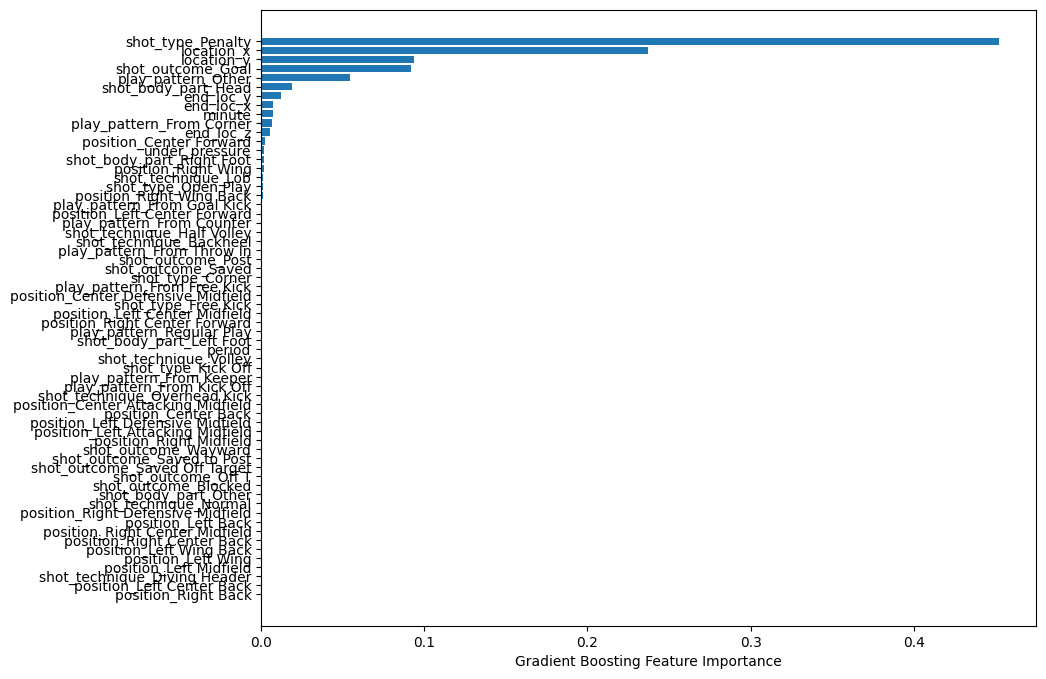

In [ ]:
import matplotlib.pyplot as plt

# Feature importance
feature_importances = gbr_model.feature_importances_
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), X_train.columns[sorted_idx])
plt.xlabel("Gradient Boosting Feature Importance")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

# Perform Grid Search
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Best Score: 0.005304584290857418


In [ ]:
# Predict on training data
y_train_pred = gbr_model.predict(X_train)

# Predict on testing data
y_test_pred = gbr_model.predict(X_test)


In [ ]:
from sklearn.metrics import r2_score

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"R² Score - Training: {train_r2:.4f}, Testing: {test_r2:.4f}")


R² Score - Training: 0.9108, Testing: 0.8285


In [ ]:
from sklearn.metrics import mean_absolute_error

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"MAE - Training: {train_mae:.4f}, Testing: {test_mae:.4f}")


MAE - Training: 0.0260, Testing: 0.0359


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(f"MSE - Training: {train_mse:.4f}, Testing: {test_mse:.4f}")
print(f"RMSE - Training: {train_rmse:.4f}, Testing: {test_rmse:.4f}")


MSE - Training: 0.0022, Testing: 0.0041
RMSE - Training: 0.0468, Testing: 0.0637


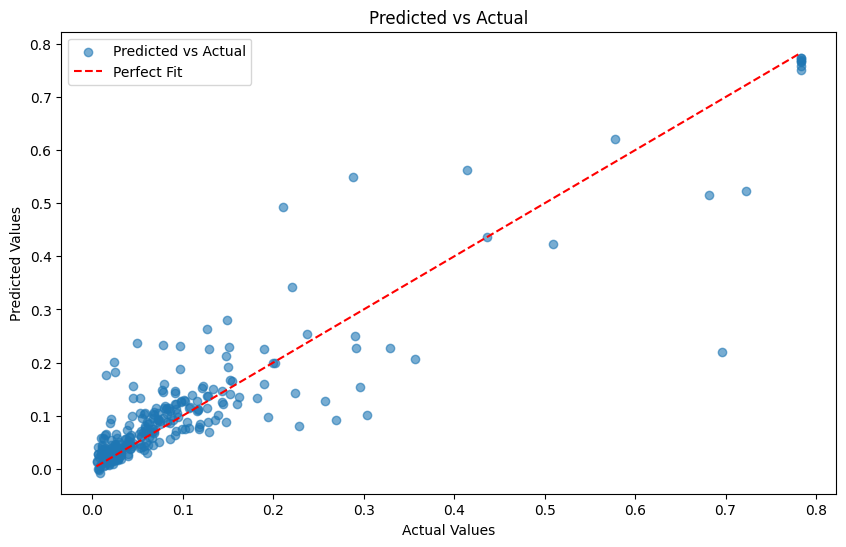

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual")
plt.legend()
plt.show()


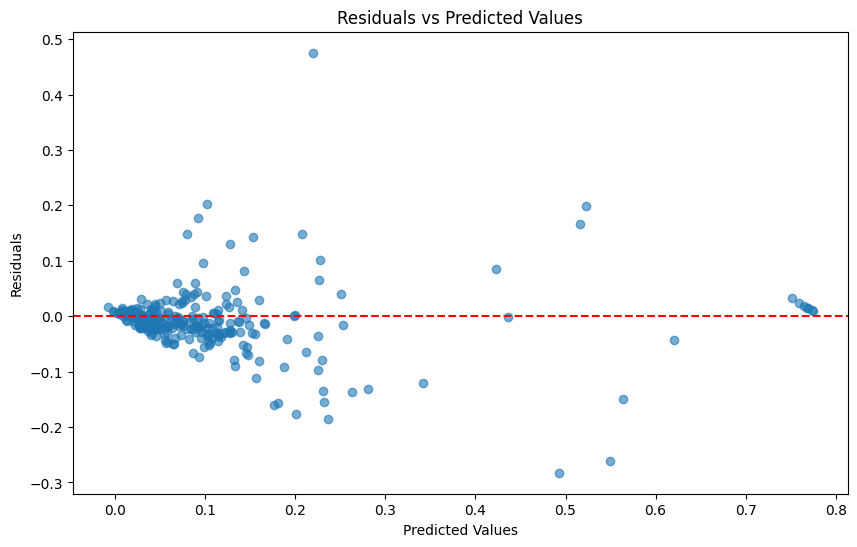

In [ ]:
residuals = y_test - y_test_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()


In [ ]:
import joblib

# Save the model
joblib.dump(gbr_model, "gradient_boosting_model.pkl")


['gradient_boosting_model.pkl']